# Generate GeoJSON from Natural Earth Data

## Install Dependencies

```
pip install geopandas shapely
```

## Download Data

Download the [Admin 1 – States, Provinces
](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/) dataset from Natural Earch Data and provide the path to the downloaded file below.

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely

df_admin0_10m = gpd.read_file(os.path.expanduser("ne_10m_admin_0_countries.zip"))
df_10m = gpd.read_file(os.path.expanduser("ne_10m_admin_1_states_provinces.zip"))
df_50m = gpd.read_file(os.path.expanduser("ne_50m_admin_1_states_provinces.zip"))

In [2]:
df_50m.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt', 'name_local',
       'type', 'type_en', 'code_local', 'code_hasc', 'note', 'hasc_maybe',
       'region', 'region_cod', 'provnum_ne', 'gadm_level', 'check_me',
       'datarank', 'abbrev', 'postal', 'area_sqkm', 'sameascity', 'labelrank',
       'name_len', 'mapcolor9', 'mapcolor13', 'fips', 'fips_alt', 'woe_id',
       'woe_label', 'woe_name', 'latitude', 'longitude', 'sov_a3', 'adm0_a3',
       'adm0_label', 'admin', 'geonunit', 'gu_a3', 'gn_id', 'gn_name',
       'gns_id', 'gns_name', 'gn_level', 'gn_region', 'gn_a1_code',
       'region_sub', 'sub_code', 'gns_level', 'gns_lang', 'gns_adm1',
       'gns_region', 'min_label', 'max_label', 'min_zoom', 'wikidataid',
       'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_pl', 'name_

In [3]:
df_admin0_10m.columns = df_admin0_10m.columns.str.lower()
df_admin0_10m.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit',
       'gu_a3', 'su_dif', 'subunit', 'su_a3', 'brk_diff', 'name', 'name_long',
       'brk_a3', 'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en',
       'formal_fr', 'name_ciawf', 'note_adm0', 'note_brk', 'name_sort',
       'name_alt', 'mapcolor7', 'mapcolor8', 'mapcolor9', 'mapcolor13',
       'pop_est', 'pop_rank', 'gdp_md_est', 'pop_year', 'lastcensus',
       'gdp_year', 'economy', 'income_grp', 'wikipedia', 'fips_10_', 'iso_a2',
       'iso_a3', 'iso_a3_eh', 'iso_n3', 'un_a3', 'wb_a2', 'wb_a3', 'woe_id',
       'woe_id_eh', 'woe_note', 'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un',
       'adm0_a3_wb', 'continent', 'region_un', 'subregion', 'region_wb',
       'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart', 'min_zoom',
       'min_label', 'max_label', 'ne_id', 'wikidataid', 'name_ar', 'name_bn',
       'name_de', 'name_

In [4]:
df_50m.groupby('admin').count()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
admin,,,,,,,,,,,,,,,,,,,,,
Australia,9,9,9,9,9,0,9,9,9,0,...,9,9,9,9,9,9,9,9,9,9
Brazil,27,27,27,27,27,0,27,27,27,13,...,27,27,27,27,27,27,27,27,27,27
Canada,13,13,13,13,13,13,13,13,13,9,...,13,13,13,13,13,13,13,13,13,13
United States of America,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


<AxesSubplot:>

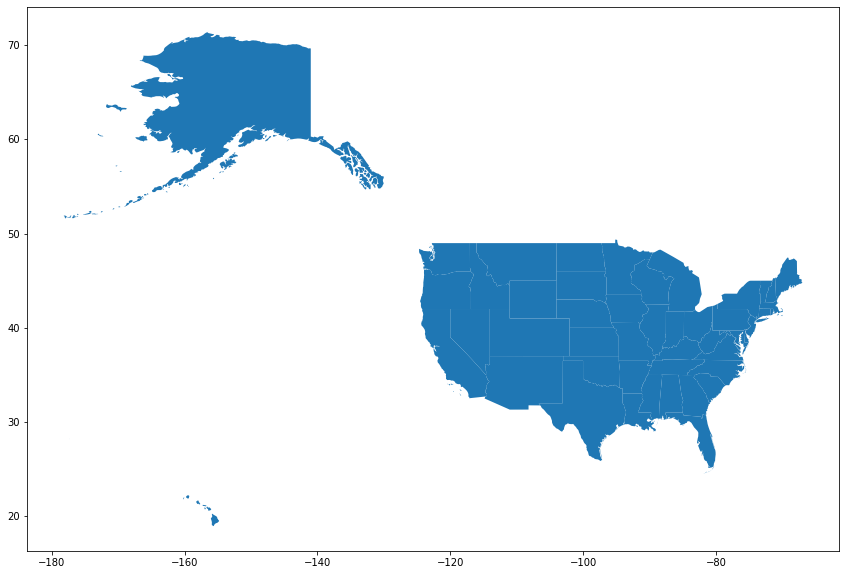

In [5]:
df_50m[df_50m.adm0_a3 == 'USA'].plot(figsize=(20,10))

Use 1:50m geometry for some large countries:

In [6]:
df_50m['admin'].unique()

array(['Australia', 'Brazil', 'Canada', 'United States of America'],
      dtype=object)

In [7]:
import pandas as pd

df = pd.concat([df_10m[~df_10m['admin'].isin(df_50m['admin'].unique())], df_50m])

## Adjust the Maps

<span style="color: red; font-size: 1.5em">TO SUPPORT NEW COUNTRIES, ADD COUNTRY NAME BELOW</span>

In [8]:
# Country names used in file names
countries = [
 'canada',
 'switzerland',
 'myanmar',
 'uruguay',
 'uk',
 'india',
 'egypt',
 'brazil',
 'portugal',
 'spain',
 'timorleste',
 'syria',
 'italy',
 'japan',
 'ukraine',
 'zambia',
 'iran',
 'thailand',
 'bulgaria',
 'morocco',
 'russia',
 'belgium',
 'germany',
 'france',
 'netherlands',
 'usa',
 'liechtenstein',
 'singapore',
 'china',
 'korea',
 'slovenia',
 'indonesia',
 'malaysia'
]

# country name used in dataset
country_name_aliases = {
    "uk": "united kingdom",
    "usa": "united states of america",
    "korea": "south korea",
    "timorleste": "east timor",
}

Make sure all country names are covered:

In [9]:
[x for x in countries if country_name_aliases.get(x, x) not in df["admin"].str.lower().unique()]

[]

Preview all countries:

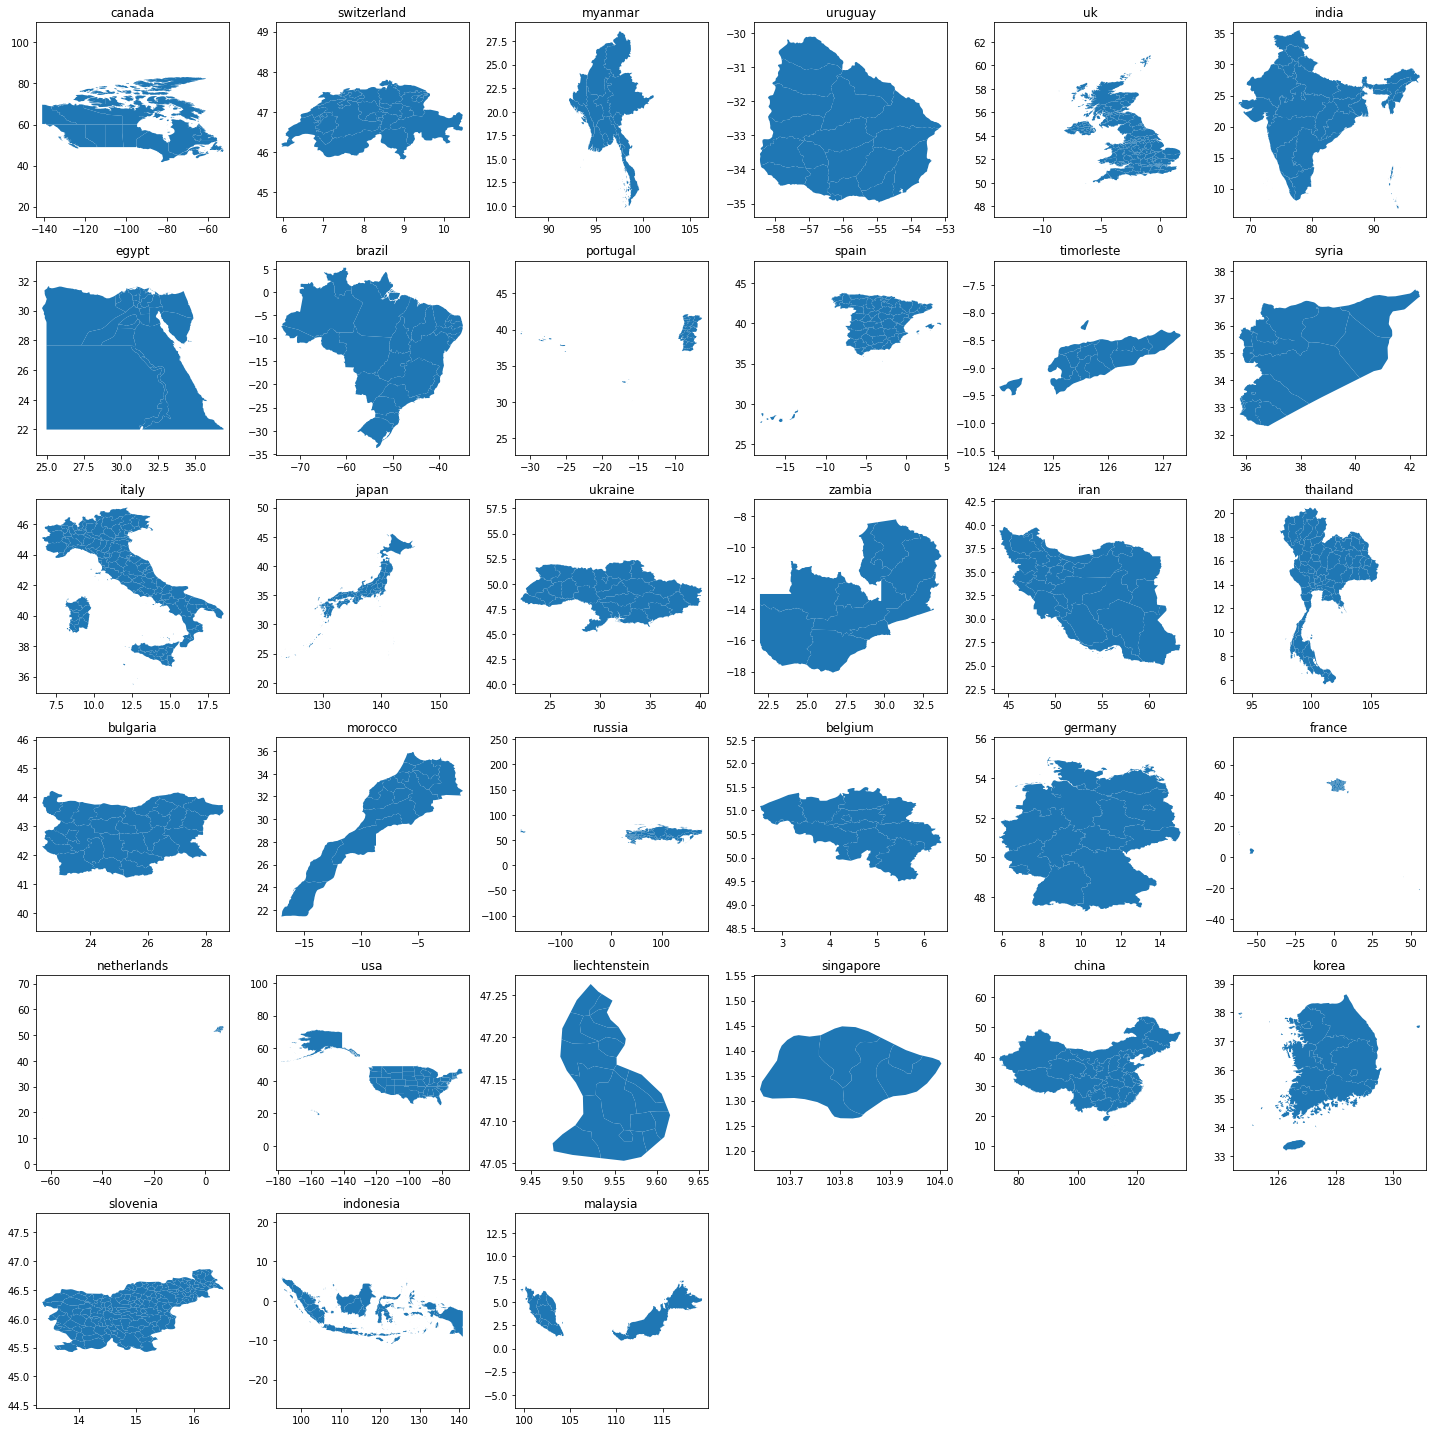

In [10]:
alt_maps = dict()

def get_gdf(country):
    country_alias = country_name_aliases.get(country, country)
    if country in alt_maps:
        gdf = alt_maps[country]
    else:
        gdf = df[df["admin"].str.lower() == country_alias]
    return gdf.copy()

def plot_all_countries():
    plt.figure(figsize=(20, 20))

    for i, country in enumerate(countries):
        # create subplot axes in a 3x3 grid
        ax = plt.subplot(len(countries) // 5, 6, i + 1) # nrows, ncols, axes position
        get_gdf(country).plot(ax=ax)
        ax.set_title(country)
        ax.set_aspect('equal', adjustable='datalim')
    
    plt.tight_layout()
    plt.show()

plot_all_countries()

### Handle countries with flying islands

#### USA

For countries with flying islands, we need to move the islands closer to the mainland.

<AxesSubplot:>

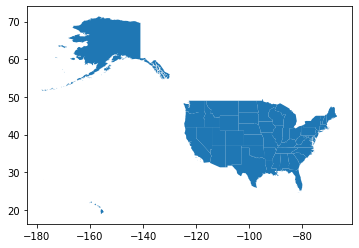

In [11]:
usa = df[df['adm0_a3'] == 'USA']
usa.plot()

<AxesSubplot:>

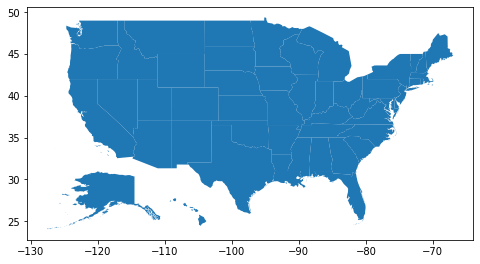

In [12]:
def reposition(df, idx, xoff=None, yoff=None, xscale=None, yscale=None, simplify=None):
    
    def move_and_scale(series):
        if xoff or yoff:
            series = shapely.affinity.translate(series, xoff or 0, yoff or 0)
        if xscale or yscale:
            series = shapely.affinity.scale(series, xscale or 1, yscale or 1)
        if simplify:
            series = series.simplify(simplify, preserve_topology=False)
        return series
    
    df.loc[idx, 'geometry'] = df.loc[idx, 'geometry'].apply(move_and_scale)


usa_copy = usa.copy()
reposition(usa_copy, usa.name == 'Hawaii', 51, 5.5)
reposition(usa_copy, usa.name == 'Alaska', 35, -34, 0.35, 0.35)

usa_copy.plot(figsize=(8,8))

#### China

China claims sovereign over Taiwan. For disputed territories, we respect each country and give them what they want.

In addition, Hong Kong and Macau should also be included in a China map.

In [13]:
# Chinese Special Administrative Regions
china_sars = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Taiwan', 'Hong Kong', 'Macau']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
china_sars = china_sars.merge(pd.DataFrame(
    data={ 
        "name_en": ["Taiwan", "Hong Kong", "Macau"],
        "name_zh": ["中国台湾", "香港特别行政区", "澳门特别行政区"],
        "iso_3166_2": ["CN-71", "CN-91", "CN-92"],
    },
), on="name_en", how="left")
china_sars

,featurecla,scalerank,labelrank,sov_a3,type,admin,adm0_a3,gu_a3,name,abbrev,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh_x,geometry,name_zh_y,iso_3166_2
0,Admin-0 country,0,4,CH1,Country,Hong Kong S.A.R.,HKG,HKG,Hong Kong,H.K.,...,Hongkong,Hong Kong,Гонконг,Hongkong,Hong Kong,Hồng Kông,香港,"MULTIPOLYGON (((114.22983 22.55581, 114.23471 ...",香港特别行政区,CN-91
1,Admin-0 country,0,3,TWN,Sovereign country,Taiwan,TWN,TWN,Taiwan,Taiwan,...,Republika Chińska,Taiwan,Китайская Республика,Taiwan,Çin Cumhuriyeti,Đài Loan,中華民國,"MULTIPOLYGON (((121.90577 24.95010, 121.83473 ...",中国台湾,CN-71
2,Admin-0 country,0,4,CH1,Country,Macao S.A.R,MAC,MAC,Macao,Mac.,...,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",澳门特别行政区,CN-92


<AxesSubplot:>

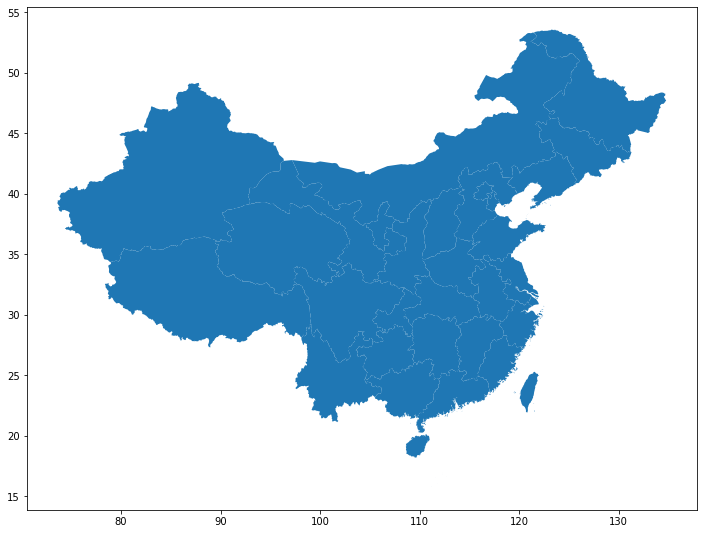

In [14]:
china = df[df.admin == "China"]
china_copy = china.append(china_sars)
china_copy["name_zh"] = china_copy["name_zh"].combine_first(china_copy["name_zh_y"])
china_copy = china_copy.drop(["name_zh_x", "name_zh_y"], axis=1)
china_copy.plot(figsize=(12, 12))

Note [ISO-3166-2:CN](https://en.wikipedia.org/wiki/ISO_3166-2:CN) has updated subdivisions to use letters instead of numbers (e.g. `CN-91` -> `CN-HK`). We kept the numeric code for backward compatibility.

#### Portugal

<AxesSubplot:>

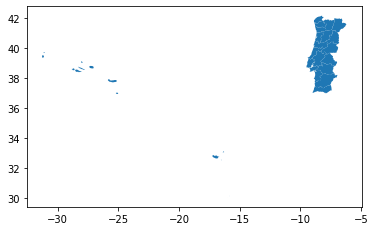

In [15]:
portugal = df[df.admin == 'Portugal']
portugal.plot()

<AxesSubplot:>

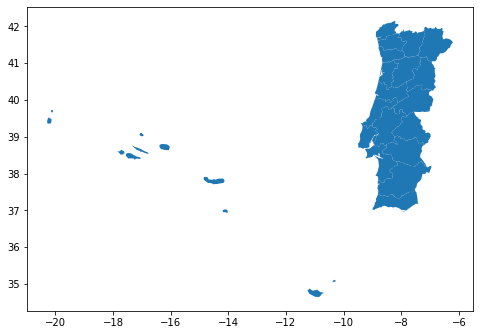

In [16]:
portugal_copy = portugal.copy()
reposition(portugal_copy, portugal.name == 'Azores', 11, 0)
reposition(portugal_copy, portugal.name == 'Madeira', 6, 2, simplify=0.015)
portugal_copy.plot(figsize=(8, 8))

#### Spain

<AxesSubplot:>

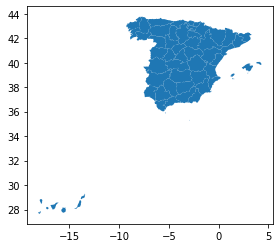

In [17]:
spain = df[df.admin == 'Spain']
spain.plot()

<AxesSubplot:>

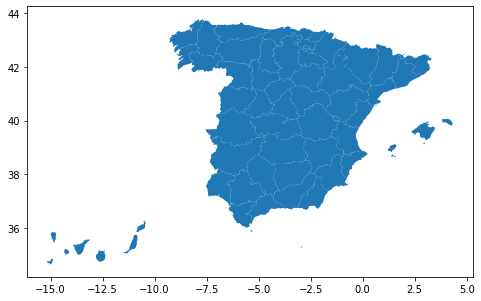

In [18]:
spain_copy = spain.copy()
reposition(spain_copy, spain.name.isin(['Las Palmas', 'Santa Cruz de Tenerife']), 3, 7, 1, 1)
spain_copy.plot(figsize=(8, 8))

#### Russia

<AxesSubplot:>

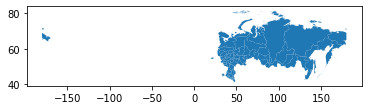

In [19]:
russia = df[df.admin == 'Russia']
russia.plot()

Russia looks off because of Chukchi runs across E180. We need to move the parts on the other side of the map to the right.

<AxesSubplot:>

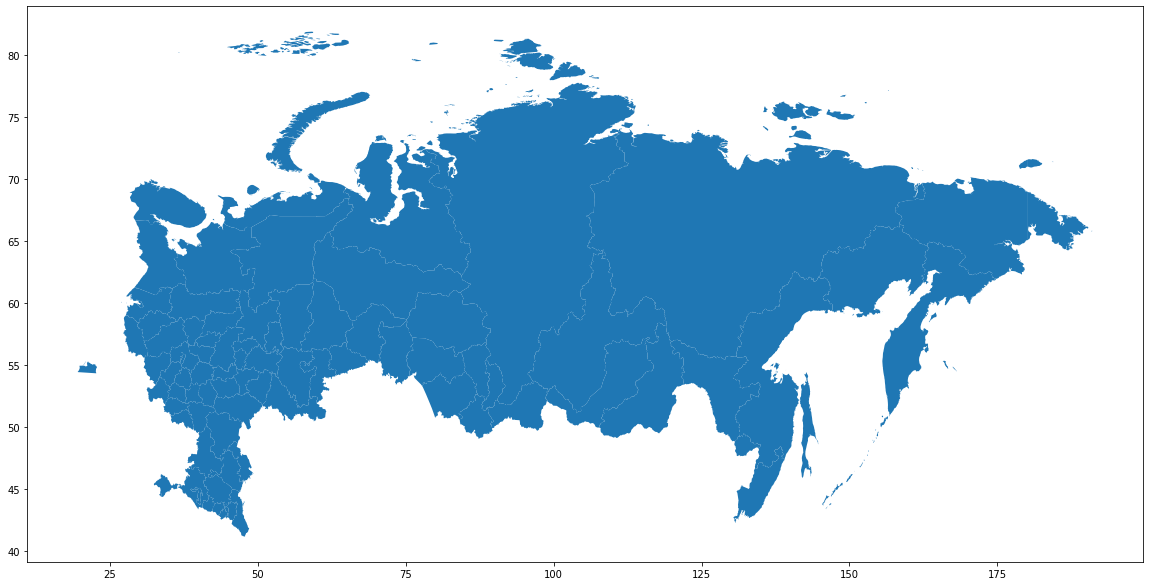

In [20]:
def shift_geom(geom, cutoff=0):
    border = shapely.geometry.LineString([(cutoff,-90),(cutoff, 90)])
    splitted_geom = shapely.ops.split(geom, border)
    moved_geom = []

    for item in splitted_geom:
        minx, miny, maxx, maxy = item.bounds
        if minx < cutoff:
            moved_geom.append(shapely.affinity.translate(item, xoff=cutoff + 360))
        else:
            moved_geom.append(item)

    # got `moved_geom` as the moved geometry            
    return shapely.ops.unary_union(moved_geom)

russia_copy = russia.copy()
russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
] = russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
].apply(shift_geom)

russia_copy = russia_copy

russia_copy.plot(figsize=(20, 20))

#### France

<AxesSubplot:>

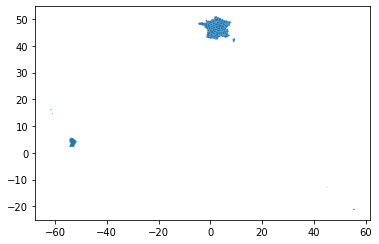

In [21]:
france = df[df.admin == 'France']
france.plot()

Ignore all the oversea islands

<AxesSubplot:>

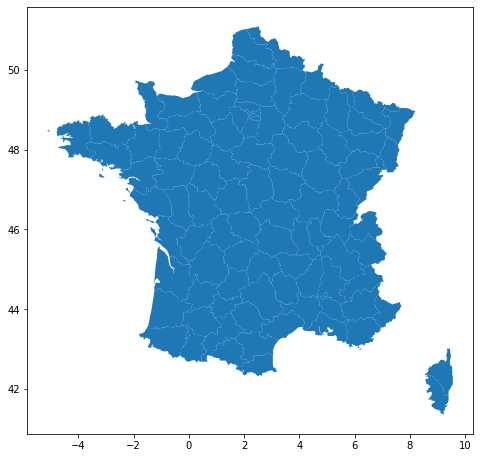

In [22]:
def apply_bounds(df, northwest, southeast):
    x1, y1 = northwest
    x2, y2 = southeast
    boundry = shapely.geometry.Polygon([(x1, y1),(x1, y2), (x2, y2), (x2, y1)])
    df = df.copy()
    return df[df.geometry.apply(lambda x: boundry.contains(x))]

france_copy = apply_bounds(france, (-20, 60), (20, 20))
france_copy.plot(figsize=(8, 8))

#### Netherlands

<AxesSubplot:>

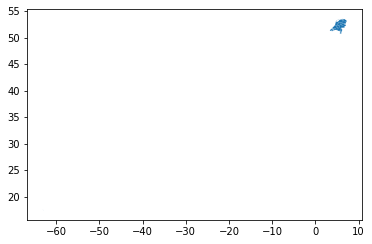

In [23]:
netherlands = df[df.admin == 'Netherlands']
netherlands.plot()

<AxesSubplot:>

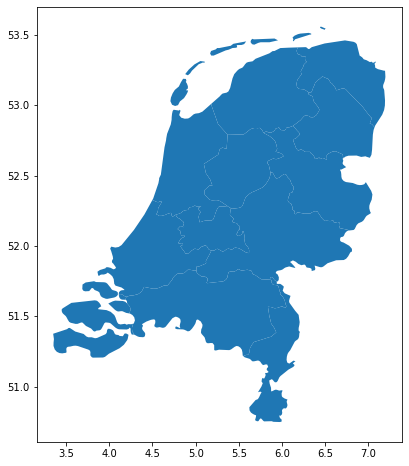

In [24]:
netherlands_copy = apply_bounds(netherlands, (-20, 60), (20, 20))
netherlands_copy.plot(figsize=(8, 8))

#### UK

<AxesSubplot:>

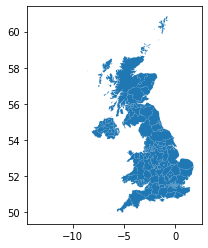

In [25]:
uk = df[df.admin == 'United Kingdom']
uk.plot()

<AxesSubplot:>

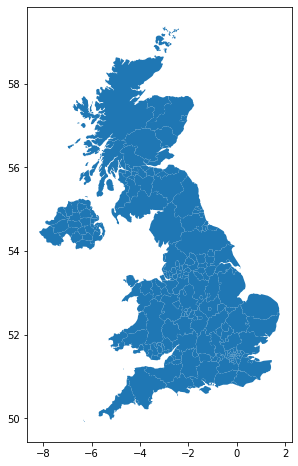

In [26]:
uk_copy = apply_bounds(uk, (-10, 60), (20, 20))
uk_copy.plot(figsize=(8, 8))

## Output GeoJSON

In [27]:
alt_maps = {
    "china": china_copy,
    "usa": usa_copy,
    "france": france_copy,
    "netherlands": netherlands_copy,
    "uk": uk_copy,
    "russia": russia_copy,
    "spain": spain_copy,
    "portugal": portugal_copy,
}

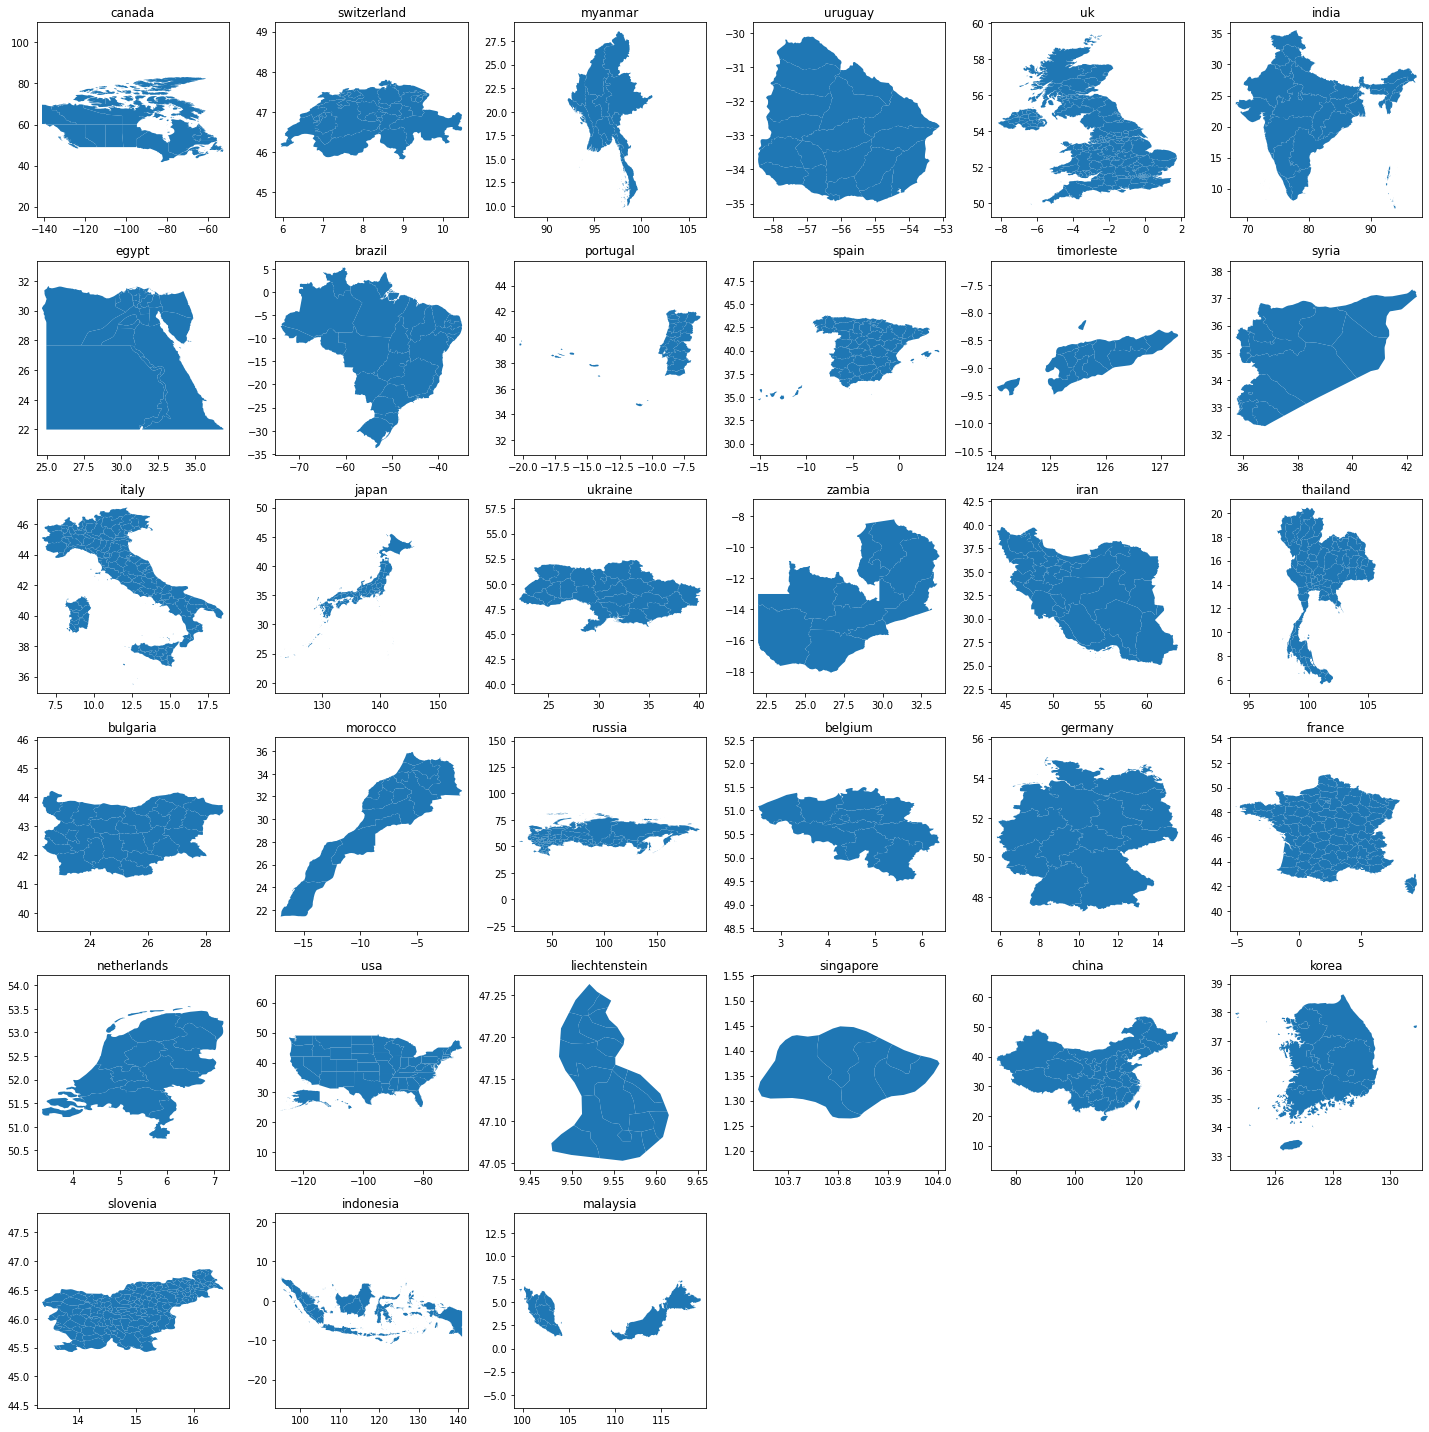

In [28]:
plot_all_countries()

In [29]:
simplify_factors = {
    "uk": 0.005,
}
useful_columns = ["ISO", "NAME_1", "geometry"]

def get_simplify_factor_by_size(gdf):
    xmin, ymin, xmax, ymax = shapely.ops.unary_union(gdf["geometry"]).bounds
    size = (xmax - xmin) * (ymax - ymin)
    print("Size", round(size, 3), end="\t")
    if size > 1000: return 0.03
    if size > 300: return 0.02
    if size > 100: return 0.01
    return 0
    
def simplify_if_needed(country, gdf):
    """Simplify the maps based on country size"""
    country_alias = country_name_aliases.get(country, country)
    if country_alias in df_50m["admin"].str.lower().unique():
        return
    
    factor = simplify_factors.get(country) or get_simplify_factor_by_size(gdf)
        
    if factor:
        gdf["geometry"] = gdf.simplify(factor)

def save_geojson(country):
    gdf = get_gdf(country)
    print(country, end="\t")
    
    # For backward compatibility
    gdf["ISO"] = gdf["iso_3166_2"]
    gdf["NAME_1"] = gdf["name"]
    
    simplify_if_needed(country, gdf)
        
    print(f'Saving geojson for {country}...')
    gdf[useful_columns].to_file(f"../src/countries/{country}.geojson", driver="GeoJSON")

for country in countries:
    save_geojson(country)
    
print("Done.                          ")

canada	Saving geojson for canada...
switzerland	Size 8.935	Saving geojson for switzerland...
myanmar	Size 168.709	Saving geojson for myanmar...
uruguay	Size 25.985	Saving geojson for uruguay...
uk	Saving geojson for uk...
india	Size 840.038	Saving geojson for india...
egypt	Size 117.982	Saving geojson for egypt...
brazil	Saving geojson for brazil...
portugal	Size 105.727	Saving geojson for portugal...
spain	Size 178.488	Saving geojson for spain...
timorleste	Size 4.486	Saving geojson for timorleste...
syria	Size 33.348	Saving geojson for syria...
italy	Size 138.162	Saving geojson for italy...
japan	Size 661.569	Saving geojson for japan...
ukraine	Size 128.988	Saving geojson for ukraine...
zambia	Size 115.483	Saving geojson for zambia...
iran	Size 284.014	Saving geojson for iran...
thailand	Size 122.959	Saving geojson for thailand...
bulgaria	Size 18.715	Saving geojson for bulgaria...
morocco	Size 231.84	Saving geojson for morocco...
russia	Size 6969.988	Saving geojson for russia...
bel